# Alexnet

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-11-26 01:46:46.204632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 01:46:46.221965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732603606.239460   41094 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732603606.243448   41094 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 01:46:46.256988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Preparation for trainning - Train Split

In [3]:
path = os.path.realpath('data/Dataset of Breast mammography images with Masses')
list_path = path.split('/')
list_path.remove('notebooks')
list_path.remove('breast-cancer-project')
path = os.path.join('/'.join(list_path), 'Image After Data Augmentation, Image Size 227x227/')

In [4]:
batch_size_n = 64

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(227, 227),
    batch_size=batch_size_n,
)

Found 7632 files belonging to 8 classes.
Using 6106 files for training.


I0000 00:00:1732603605.961259   41094 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
classes_ = train_ds.class_names
len(classes_)

8

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(227, 227),
    batch_size=batch_size_n,
)

Found 7632 files belonging to 8 classes.
Using 1526 files for validation.


In [8]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds, val_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Preparation for trainning - Test Split

In [9]:
path = os.path.realpath('data/Dataset of Breast mammography images with Masses')
list_path = path.split('/')
list_path.remove('notebooks')
list_path.remove('breast-cancer-project')
path = os.path.join('/'.join(list_path), 'Image Before Data Augmentation, Image Size 227x227/')

In [10]:
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(227, 227),
    batch_size=batch_size_n,
)

Found 212 files belonging to 8 classes.
Using 170 files for training.


In [11]:
val_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(227, 227),
    batch_size=batch_size_n,
)

Found 212 files belonging to 8 classes.
Using 42 files for validation.


In [12]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds_test = train_ds_test.map(normalize)
val_ds_test = val_ds_test.map(normalize)

train_ds_test, val_ds_test

(<_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Training

In [13]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation= 'relu'),
    Dense(8, activation='softmax')
])

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              auto_scale_loss='True',
              metrics=['accuracy'])

In [15]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    batch_size=batch_size_n,
                    epochs=epochs)

Epoch 1/50


I0000 00:00:1732603608.810414   41200 service.cc:148] XLA service 0x7f8c180182e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732603608.810544   41200 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-26 01:46:48.926305: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732603609.377794   41200 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-26 01:46:50.672840: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 196 bytes spill stores, 196 bytes spill loads

2024-11-26 01:46:50.832021: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2672 - loss: 2.1019

2024-11-26 01:47:11.029030: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_614', 148 bytes spill stores, 148 bytes spill loads

2024-11-26 01:47:11.151296: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 152 bytes spill stores, 152 bytes spill loads

2024-11-26 01:47:11.162386: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_614_0', 272 bytes spill stores, 272 bytes spill loads

2024-11-26 01:47:11.646221: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 244 bytes spill stores, 244 bytes spill loads

2024-11-26 01:47:11.775794: I external/local_xla/xla/s

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2673 - loss: 2.0996

2024-11-26 01:47:20.763782: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_106', 244 bytes spill stores, 244 bytes spill loads

2024-11-26 01:47:20.889516: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_113', 272 bytes spill stores, 272 bytes spill loads

2024-11-26 01:47:21.315975: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_106', 248 bytes spill stores, 248 bytes spill loads

2024-11-26 01:47:21.442197: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_113', 244 bytes spill stores, 244 bytes spill loads

2024-11-26 01:47:21.489390: I external/local_xla/xla/str

96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 237ms/step - accuracy: 0.2674 - loss: 2.0975 - val_accuracy: 0.2864 - val_loss: 1.7872
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.2958 - loss: 1.7577 - val_accuracy: 0.3028 - val_loss: 1.7622
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.2970 - loss: 1.7621 - val_accuracy: 0.3028 - val_loss: 1.7578
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2962 - loss: 1.7541 - val_accuracy: 0.3028 - val_loss: 1.7566
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.3003 - loss: 1.7532 - val_accuracy: 0.3028 - val_loss: 1.7635
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.2996 - loss: 1.7589 - val_accuracy: 0.3028 - val_loss: 1.7602
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.3027 - loss: 1.7457 - val_accuracy: 0.3028 - val_loss: 1.7568
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2990 - loss: 1.7492 - val_accuracy: 0.3028 - val_loss: 

# Evaluating

In [16]:
history.history

{'accuracy': [0.2785784602165222,
  0.2951195538043976,
  0.29446446895599365,
  0.2905339002609253,
  0.2969210743904114,
  0.29724860191345215,
  0.29462823271751404,
  0.2893874943256378,
  0.29986897110939026,
  0.2987225651741028,
  0.292990505695343,
  0.29282674193382263,
  0.29544711112976074,
  0.29806748032569885,
  0.30167049169540405,
  0.29561087489128113,
  0.2885686159133911,
  0.29642975330352783,
  0.30167049169540405,
  0.2967572808265686,
  0.29561087489128113,
  0.29806748032569885,
  0.30167049169540405,
  0.2961021959781647,
  0.30167049169540405,
  0.2941369116306305,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.29528331756591797,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.30167049169540405,
  0.3005240857601166,
  0.30167049169540405,
  0.30167049169540405,
  0.2997052073478699,
  0.301670491

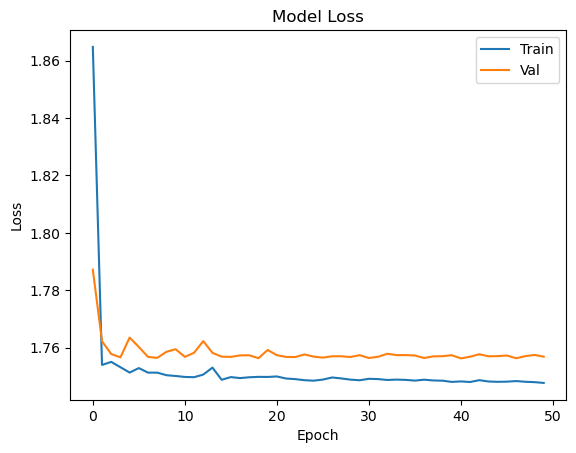

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

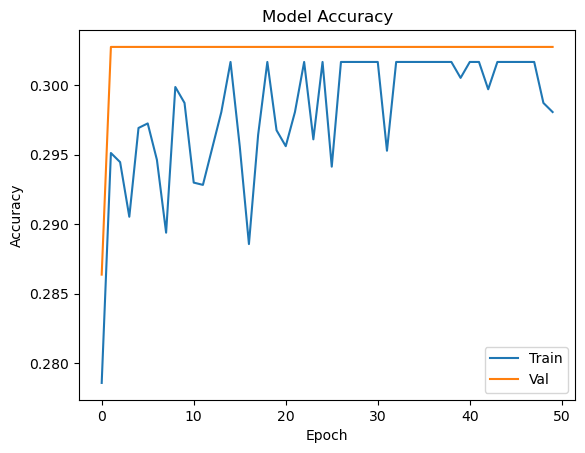

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

24/24 - 1s - 25ms/step - accuracy: 0.3028 - loss: 1.7568


In [20]:
print(test_acc)

0.302752286195755


In [21]:
predictions = model.predict(train_ds_test)
val_pred = np.argmax(predictions, axis=1)

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step

2024-11-26 01:54:01.943490: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96_0', 272 bytes spill stores, 272 bytes spill loads

2024-11-26 01:54:01.977505: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89', 248 bytes spill stores, 248 bytes spill loads

2024-11-26 01:54:03.051312: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89', 244 bytes spill stores, 244 bytes spill loads

2024-11-26 01:54:03.107310: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96', 244 bytes spill stores, 244 bytes spill loads

2024-11-26 01:54:03.242284: I external/local_xla/xla/strea

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step  


In [22]:
y_true = []
y_pred = []
for images, labels in val_ds_test:
  # Make predictions on the batch
  batch_pred = model.predict(images)
  y_pred.extend(list(batch_pred.argmax(axis=1)))  # Predicted labels
  y_true.extend(list(labels.numpy()))  # True labels from the batch

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

2024-11-26 01:54:07.377964: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_94_0', 252 bytes spill stores, 252 bytes spill loads

2024-11-26 01:54:07.505812: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87', 196 bytes spill stores, 196 bytes spill loads

2024-11-26 01:54:07.932748: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_101', 236 bytes spill stores, 236 bytes spill loads

2024-11-26 01:54:07.995448: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_94', 200 bytes spill stores, 200 bytes spill loads

2024-11-26 01:54:08.312159: I external/local_xla/xla/stre

1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

2024-11-26 01:54:11.505749: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87_0', 248 bytes spill stores, 248 bytes spill loads

2024-11-26 01:54:11.691630: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_94_0', 260 bytes spill stores, 260 bytes spill loads

2024-11-26 01:54:12.059908: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_101', 24 bytes spill stores, 24 bytes spill loads



2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


2024-11-26 01:54:13.613792: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


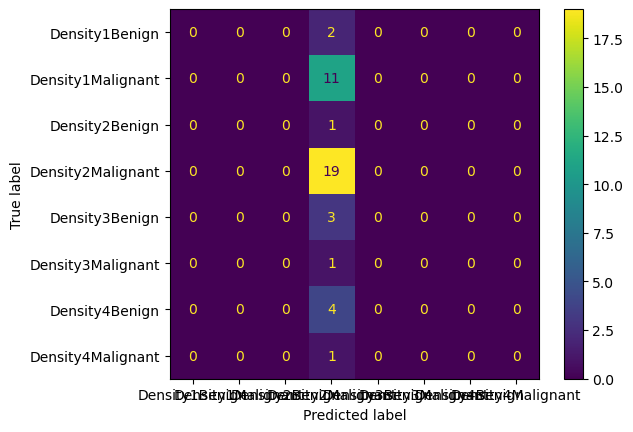

In [23]:
disp = ConfusionMatrixDisplay(cm, display_labels=classes_,)
disp.plot()

In [24]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.45      1.00      0.62        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1

    accuracy                           0.45        42
   macro avg       0.06      0.12      0.08        42
weighted avg       0.20      0.45      0.28        42



/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Save

In [25]:
# model.save('models/breast_cancer_classification-alexnet.h5')